# Neural Network implementation with Fashion MNIST

# Importing the required packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import util_mnist_reader as mnist_reader

# Extracting the mnist data

In [2]:
def load_data():
    X_train, y_train = mnist_reader.load_mnist(r'data/fashion', kind='train')
    X_test, y_test = mnist_reader.load_mnist(r'data/fashion', kind='t10k')
    return X_train,y_train,X_test,y_test

#  Neural network implementation with hidden layer from scratch

In [3]:
def neuralnetwork():
    import numpy as np
    import matplotlib.pyplot as plt
    import util_mnist_reader as mnist_reader
    
    #Loading the dataset values
    X_train,y_train,X_test,y_test=load_data()
    
    #Normalizing the data
    X_train=X_train/255
    X_test=X_test/(255)
    print("-------NEURAL NETWORK IMPLEMENTATION WITH HIDDEN LAYER FROM SCRATCH-------\n\n")
    print("x_train shape:",X_train.shape,"y_train shape:",y_train.shape)

    digits = 10
    trainexamples = y_train.shape[0]

    #Reshaping the data
    y_train = y_train.reshape(1, trainexamples)

    Y_newtrain = np.eye(digits)[y_train.astype('int32')]
    Y_newtrain = Y_newtrain.T.reshape(digits, trainexamples)
    
    testexamples = y_test.shape[0]
    y_test = y_test.reshape(1, testexamples)
    Y_newtest = np.eye(digits)[y_test.astype('int32')]
    Y_newtest = Y_newtest.T.reshape(digits, testexamples)
    
    m = 60000
    m_test = X_train.shape[0] - m
    X_train, X_test = X_train.T, X_test.T
    Y_train, Y_test = Y_newtrain, Y_newtest

    #Calculating the sigmoid value
    def sigmoid(z):
        s = 1 / (1 + np.exp(-z))
        return s

    #Calculating the loss function value
    def calculate_loss(Y, Y_hat):
        L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
        m = Y.shape[1]
        L = -(1/m) * L_sum
        return L

    n_x = X_train.shape[0]
    n_h = 64
    learning_rate = 1

    loss_data=[]
    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(digits, n_h)
    b2 = np.zeros((digits, 1)) 
    
    X = X_train
    Y = Y_train
    epochs=500

    #Evaluating the model for different epochs
    for i in range(epochs):

        Z1 = np.matmul(W1,X) + b1
        A1 = sigmoid(Z1)
        Z2 = np.matmul(W2,A1) + b2
        A2=np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
        
        cost = calculate_loss(Y, A2)

        dZ2 = A2-Y
        dW2 = (1/m) * np.matmul(dZ2, A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

        dA1 = np.matmul(W2.T, dZ2)
        dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
        dW1 = (1/m) * np.matmul(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1

        #Appending the cost to the loss_data list
        loss_data.append(cost)

    print("Final cost:", cost)
    
    epochs=range(1,epochs+1)
    
    #Graph plotting for loss vs epochs
    plt.plot(epochs,loss_data)
    plt.xticks(epochs, rotation ='vertical')
    plt.title('Neural Network with hidden layer')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()


    from sklearn.metrics import confusion_matrix,accuracy_score
    from sklearn import metrics

    Z1 = np.matmul(W1, X_test) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    predictions = np.argmax(A2, axis=0)
    labels = np.argmax(Y_test, axis=0)
    
    #Confusion matrix calculation
    print("Confusion matrix is:\n")
    matrix_data=confusion_matrix(predictions, labels)
    print(matrix_data) 
    print("\n")
    
    #Accuracy calculation
    accuracy=np.abs(metrics.accuracy_score(labels,predictions))*100
    print("Accuracy on the data is:",accuracy,"%")
    print("\n\n")
    

# Multi-layer neural network implementation with keras

In [4]:
def multilayerneuralnetwork():
    
    
    from keras.layers import Dense,Flatten
    from keras.models import Sequential
    import util_mnist_reader as mnist_reader
    from sklearn.metrics import confusion_matrix,accuracy_score
    from sklearn import metrics
    
    #Loading the mnist dataset
    X_train,y_train,X_test,y_test=load_data()
    logdir="logs/"
    tensorboard_callback=keras.callbacks.TensorBoard(log_dir=logdir)
    
    print("-------MULTI LAYER NEURAL NETWORK IMPLEMENTATION WITH KERAS-------\n\n")
    print("x_train shape:",X_train.shape,"y_train shape:",y_train.shape)
    
    #number of epochs required
    epochs_final=50
    
    X_train = X_train.reshape(60000,28,28)
    X_test = X_test.reshape(10000,28,28)
    
    #Normalizing the data
    X_train=X_train.astype('float32')/255
    X_test=X_test.astype('float32')/255
    print(X_train.shape)
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(64, input_dim=X_train.shape[1], activation='sigmoid'))
    model.add(Dense(128, input_dim=X_train.shape[1], activation='sigmoid'))
    model.add(Dense(10, activation='softmax'))
    model.summary()
    
    model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

    history=model.fit(X_train,y_train,epochs=epochs_final,validation_data=(X_test,y_test))
    
    epoch=range(1,epochs_final+1)
    #Graph plotting for loss ve epochs
    plt.plot(epoch,history.history['loss'])
    plt.xticks(epoch, rotation ='vertical')
    plt.title('Multi layered Neural Network with keras')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.show()
    
    #Calculating the values of prediction.
    y_pred=model.predict_classes(X_test)
    y_true = y_test
    matrix_data = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
    
    #Confusion matrix calculation
    print("Confusion matrix is:\n")
    print(matrix_data)
    print("\n")
    
    #Accuracy calculation
    accuracy=np.abs(metrics.accuracy_score(y_true,y_pred))*100
    print("Accuracy on the data is:",accuracy,"%")
    print("\n\n")

# Convolutional neural network implementation with keras


In [5]:
def convolutionalneuralnetwork():
    
    import util_mnist_reader as mnist_reader
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten
    from keras.layers import Conv2D, MaxPooling2D
    import numpy as np
    from sklearn.metrics import confusion_matrix,accuracy_score
    from sklearn import metrics
    
    batch_size = 128
    num_classes = 10
    
    #Initializing the number of epochs
    epochs_final = 7
    img_rows, img_cols = 28, 28

    #Loading the mnist dataset
    X_train,y_train,X_test,y_test=load_data()
    
    #Reshaping the retreived data
    X_train = X_train.reshape(60000,28,28,1)
    X_test = X_test.reshape(10000,28,28,1)
    
    #Normalizing the data
    X_train=X_train.astype('float32')/255
    X_test=X_test.astype('float32')/255
    
    print("-------CONVOLUTIONAL NEURAL NETWORK IMPLEMENTATION WITH KERAS-------\n\n")
    print('x_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')
    
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="sgd",
              metrics=['accuracy'])

    history=model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs_final,
          verbose=1,
          validation_data=(X_test, y_test))
    score = model.evaluate(X_test, y_test, verbose=0)
    
    #Graph plotting for loss vs epochs
    epoch=range(1,epochs_final+1)
    plt.plot(epoch,history.history['loss'])
    plt.xticks(epoch, rotation ='vertical')
    plt.title('Convolutional Neural Network with keras')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.show()
    
    #Calculating the values for prediction
    y_pred=model.predict(X_test)
    Y_pred_classes = np.argmax(y_pred,axis = 1)
    Y_true = np.argmax(y_test,axis = 1)
    
    #Confusion matrix calculation
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
    print("Confusion matrix is:\n")
    print(confusion_mtx)
    print("\n")
    
    #Accuracy calculation
    accuracy=np.abs(metrics.accuracy_score(Y_true,Y_pred_classes))*100
    print("Accuracy on the data is:",accuracy,"%")

-------NEURAL NETWORK IMPLEMENTATION WITH HIDDEN LAYER FROM SCRATCH-------


x_train shape: (60000, 784) y_train shape: (60000,)
Final cost: 0.5977181752897338


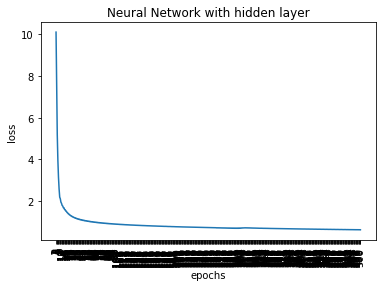

Confusion matrix is:

[[834  14  27  75   3   2 253   0   5   2]
 [  7 913   3  22   2   0   4   0   3   0]
 [ 37  19 740  27 293   0 237   0  43   3]
 [ 66  46  15 817  68   3  41   0   8   1]
 [ 10   6 165  35 585   0 144   0   6   0]
 [  2   0   4   1   2 849   3  53   9  25]
 [ 24   1  37  16  40   1 286   0  13   0]
 [  0   0   0   0   0  73   0 856   7  53]
 [ 19   1   8   7   6  19  32   8 902   4]
 [  1   0   1   0   1  53   0  83   4 912]]


Accuracy on the data is: 76.94 %





In [6]:
neuralnetwork()
multilayerneuralnetwork()
convolutionalneuralnetwork()